# Isotropic Linear Trnasformations

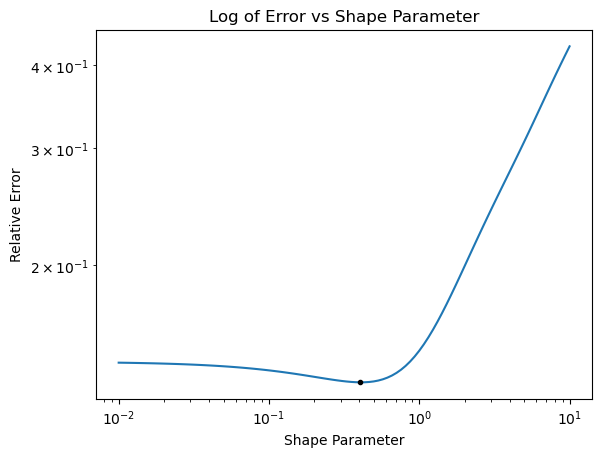

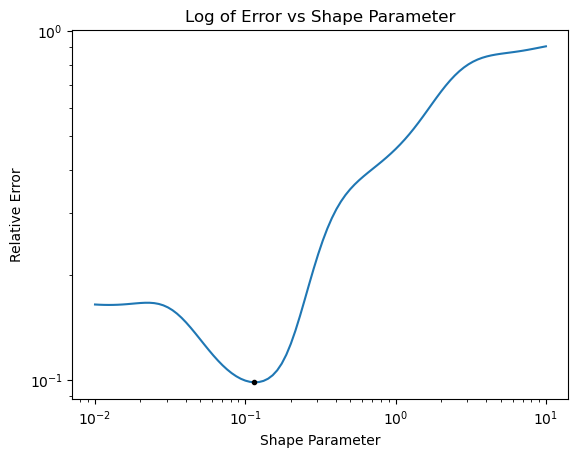

In [10]:
from ge_rbf.rbf_models import RBFmodel #import the rbf model class
import numpy as np
from pyDOE import lhs #latin hypercube sampling, can be replaced with np.random
from ge_rbf.preprocessing import HyperParameterSelection #shape parameter selection methods
from ge_rbf.preprocessing import LinearTransformation #reference frame transfromations
from ge_rbf.test_problems import NonIso #a non-isotropic test problem.

X = lhs(2, samples = 12, criterion = 'm') #data set
y, dy = NonIso(X) # sample function

model_standard = RBFmodel(X, y, dy = dy) #Create the model instance.
model_trans = RBFmodel(X, y, dy = dy) #Create the transformend model instance.

#Transform the reference frame by rotating and scaling the data
LinearTransformation.Transform(model_trans)

# The method for tansfromtion can be specifed with the method keyword:
# LinearTransformation.Transform(model_trans, method = 'GE-LHM')
# options are: ASM, GE-LHM, FV-LHM, and 'ideal' where the transformation is user specified.

#find optimum shape parameter
opt_epsi = HyperParameterSelection.gradient_validation(model_standard, fig = True)
opt_epsi = HyperParameterSelection.gradient_validation(model_trans, fig = True)

### Plot results

In [ ]:
#create figures and axis
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,4))
ax_stand = fig.add_subplot(121, projection = '3d')
ax_trans = fig.add_subplot(122, projection = '3d')

#plot underlying function
x,y = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
points = np.hstack((x.reshape(100**2,1), y.reshape(100**2,1)))

y_act, dy_act = NonIso(points)

ax_stand.plot_surface(x, y, y_act.reshape(100,100))
ax_trans.plot_surface(x, y, y_act.reshape(100,100))

#sample standard model and calculate relative error
y_pred = model_standard(points, OnlyFunc=True)
error = np.linalg.norm(y_pred - y_act)/np.linalg.norm(y_act)

ax_stand.plot_surface(x, y, y_pred.reshape(100,100))
ax_stand.set_title(f'Standard Error {np.round(error, 2)}')

#sample transformend model and calculate relative error
y_pred = model_trans(points, OnlyFunc=True)
error = np.linalg.norm(y_pred - y_act)/np.linalg.norm(y_act)

ax_trans.plot_surface(x, y, y_pred.reshape(100,100))
ax_trans.set_title(f'Transformend Error {np.round(error, 2)}')

plt.show()